In [ ]:
import os.path
import json
import scipy.misc
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import randrange

# In this exercise task you will implement an image generator. Generator objects in python are defined as having a next function.
# This next function returns the next generated object. In our case it returns the input of a neural network each time it gets called.
# This input consists of a batch of images and its corresponding labels.
class ImageGenerator:
    def __init__(self, file_path, label_path, batch_size, image_size, rotation=False, mirroring=False, shuffle=False):
        # Define all members of your generator class object as global members here.
        # These need to include:
        # the batch size
        # the image size
        # flags for different augmentations and whether the data should be shuffled for each epoch
        # Also depending on the size of your data-set you can consider loading all images into memory here already.
        # The labels are stored in json format and can be directly loaded as dictionary.
        # Note that the file names correspond to the dicts of the label dictionary.
        #TODO: implement constructor
        
        self.file_path = file_path
        self.label_path = label_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.rotation = rotation
        self.mirroring = mirroring
        self.shuffle = shuffles
        self.class_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog',
                           7: 'horse', 8: 'ship', 9: 'truck'}
        self.counter = 0

    def next(self):
        # This function creates a batch of images and corresponding labels and returns it.
        # Note that your amount of total data might not be divisible without remainder with the batch_size.
        # Think about how to handle such cases
        #TODO: implement next method
        
        """
        if shuffle is false:
            the first time next() is called: show the first batch
            the second time next() is called:: show second batch
            ...
        else if shuffle is true:
            shuffle the original dictionary
            the first time next() is called: show the first batch of the shuffled list
            the second time next() is called: show the second batch of the same shuffled list
        
        1) get the json dictionary (self.label_path)
        2) check for shuffling (self.shuffle)
        3) creat the batches (self.batch_size) and add to the last batch if it was smaller than the requested size (creat an array of arrays of image_names)
        3*) creat the a crresponding list of arrays of image lables
        4) load images for a certain batch based on the results from (3) and (self.file_path) and on the rank of the call (creat a counter variable)
        5) check for mirroring (self.mirroring)
        6) check for rotation (self.rotation)
        7) resize the images (self.image_size)
        8) save images in array and save it in the output variable (batch)
        9) save corresponding lables in output variable (lables)
        10) increment counter
        
        """
        
        #step 1 and 2: get the json dictionary (self.label_path) &&& check for shuffling (self.shuffle)
        with open(self.label_path) as labeled:
            if self.shuffle == False:
                all_labeled_image_names = json.load(labeled)

            else:
                shuffled_list = list(json.load(labaled).items())
                random.shuffle(shuffled_list)
                all_labeled_image_names = dict( shuffled_list )
                
        
        #step 3: creat the batches & creat the a crresponding lables list
        all_image_names_array = np.asarray(list(all_labeled_image_names.keys()))
        all_image_labels_array = np.asarray(list(all_labeled_image_names.values()))
        remainder = len(all_image_names_array) % self.batch_size
        if remainder != 0:
            updated_image_names_array = np.concatenate((all_image_names_array, all_image_names_array[0:self.batch_size-remainder]), axis=None)
            updated_image_labels_array = np.concatenate((all_image_labels_array, all_image_labels_array[0:self.batch_size-remainder]), axis=None)
        else:
            updated_image_names_array = all_image_names_array
            updated_image_labels_array = all_image_labels_array

        batched_image_names_matrix = np.reshape(updated_image_names_array, (-1, self.batch_size))
        batched_image_labels_matrix = np.reshape(updated_image_labels_array, (-1, self.batch_size))
        
        
        
        #step 4: load images for a single batch based on the results from (3) and (self.file_path) and on the rank of the call (creat a counter variable)

        files_path = np.asarray([self.file_path]*self.batch_size)
        current_batch = batched_image_names_matrix[self.counter]
        file_format = np.asarray(['.npy']*self.batch_size)
        filelist = tuple(np.array(files_path,dtype=object)+np.array(current_batch,dtype=object)+np.array(file_format,dtype=object))
        single_batch_of_images = np.array([np.load(image) for image in tuple(filelist)])
        
        
        #step 5&6: check mirror & rotate
        if (self.rotation == True) or (self.mirroring == True):
            image_indx_to_transform = random.sample(range(self.batch_size), k=randrange(self.batch_size))
            for i in image_indx_to_transform:
                single_batch_of_images[i] = augment(single_batch_of_images[i])
                
                
        #step 7: resize the images (self.image_size)
        (aaa,h,w,bbb) = single_batch_of_images.shape
        single_resized_batch_of_images = scipy.ndimage.zoom(single_batch_of_images, zoom = (1,self.image_size[0]/h,self.image_size[1]/w,1), order=0)
        
        
        #step 8: save images in array and save it in the output variable (batch)
        batch = single_resized_batch_of_images
        
        
        #step 9: save corresponding lables in output variable (lables)
        lables = batched_image_labels_matrix[self.counter]
        

        #step 10: increment counter
        self.counter = self.counter+1
        
        

        return batch, labels

    def augment(self,img):
        # this function takes a single image as an input and performs a random transformation
        # (mirroring and/or rotation) on it and outputs the transformed image
        #TODO: implement augmentation function

        if (self.rotation == True) and (self.mirroring == False):
            #img = np.rot90(img, randrange(4)) #in this implementation, every image has 25% chance of not being rotated
            img = np.rot90(img, random.choice([1,2,3])) #in this implementation, every image has is rotated in one way or another

        elif (self.rotation == False) and (self.mirroring == True):
            img = np.fliplr(img)

        elif (self.rotation == True) and (self.mirroring == True):
            img = np.rot90(img, randrange(4)) #in this implementation, every image has 25% chance of not being rotated
            img = np.fliplr(img)

        else:
            pass
        
        return img

    
    
    def class_name(self, x):
        # This function returns the class name for a specific input
        #TODO: implement class name function
        return
    
    
    def show(self):
        # In order to verify that the generator creates batches as required, this functions calls next to get a
        # batch of images and labels and visualizes it.
        #TODO: implement show method



In [1]:
import os.path
import json
import scipy.misc
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import randrange

In [35]:
file_path = 'C:/Users/utg_1/OneDrive/Documents/DL EX/Ex0 data/exercise_data/'
label_path = 'src_to_implement/Labels.json'
batch_size = 12
image_size = [24, 24] #h, W
rotation = True
mirroring = True
shuffle = False
counter = 0
class_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog',
                           7: 'horse', 8: 'ship', 9: 'truck'}
        


In [3]:
def augment(img):
    # this function takes a single image as an input and performs a random transformation
    # (mirroring and/or rotation) on it and outputs the transformed image
    #TODO: implement augmentation function
    
    if ((rotation == True) and (image_size[0] == image_size[1])) and (mirroring == False):
        #img = np.rot90(img, randrange(4)) #in this implementation, every image has 25% chance of not being rotated
        return np.rot90(img, random.choice([1,2,3])) #in this implementation, every image has is rotated in one way or another
        
    elif (rotation == False) and (mirroring == True):
        return np.fliplr(img)
        
    elif ((rotation == True) and (image_size[0] == image_size[1])) and (mirroring == True):
        return np.rot90(np.fliplr(img), randrange(4)) #in this implementation, every image has 25% chance of not being rotated
            
    else:
        return img
        
        
def class_name(x):
    # This function returns the class name for a specific input
    #TODO: implement class name function

    return class_dict[x]    

In [4]:
#step 1 and 2
with open(label_path) as labeled:
    if shuffle == False:
        all_labeled_image_names = json.load(labeled)
        
    else:
        shuffled_list = list(json.load(labaled).items())
        random.shuffle(shuffled_list)
        all_labeled_image_names = dict( shuffled_list )
            

In [5]:
#step 3
all_image_names_array = np.asarray(list(all_labeled_image_names.keys()))
all_image_labels_array = np.asarray(list(all_labeled_image_names.values()))
remainder = len(all_image_names_array) % batch_size
if remainder != 0:
    updated_image_names_array = np.concatenate((all_image_names_array, all_image_names_array[0:batch_size-remainder]), axis=None)
    updated_image_labels_array = np.concatenate((all_image_labels_array, all_image_labels_array[0:batch_size-remainder]), axis=None)
else:
    updated_image_names_array = all_image_names_array
    updated_image_labels_array = all_image_labels_array

batched_image_names_matrix = np.reshape(updated_image_names_array, (-1, batch_size))
batched_image_labels_matrix = np.reshape(updated_image_labels_array, (-1, batch_size))

In [6]:
#step 4: load images for a single batch based on the results from (3) and (self.file_path) and on the rank of the call (creat a counter variable)
#step 4*: and check for size then resize  (self.image_size)


#preparing files addresses
files_path = np.asarray([file_path]*batch_size)
current_batch = batched_image_names_matrix[counter]
file_format = np.asarray(['.npy']*batch_size)
filelist = tuple(np.array(files_path,dtype=object)+np.array(current_batch,dtype=object)+np.array(file_format,dtype=object))

#loading files to a list
single_batch_of_images_list = [np.load(image) for image in tuple(filelist)]

#check for size and resize, then put images in 4d array
single_batch_of_resized_images_4Darray = np.zeros((batch_size, image_size[0], image_size[1], 3)) #creat empty array for resized images
if len(np.unique(np.asarray([imag.shape for imag in single_batch_of_images_list]), axis=0)) == 1: #if all images have the same size
    ListTo4DArray = np.asarray(single_batch_of_images_list)                                       #then resize them and put all images in 4d array
    single_batch_of_resized_images_4Darray = scipy.ndimage.zoom(ListTo4DArray, zoom = (1,image_size[0]/ListTo4DArray.shape[1],image_size[1]/ListTo4DArray.shape[1],1), order=0)
                            
else:
    for i in range(batch_size):
        factor_h = image_size[0]/single_batch_of_images_list[i].shape[0]
        factor_w = image_size[1]/single_batch_of_images_list[i].shape[1]
        single_batch_of_resized_images_4Darray[i] = scipy.ndimage.zoom(single_batch_of_images_list[i], zoom = (factor_h,factor_w,1), order=0)
     

In [7]:
#step 5&6: check mirror & rotate
if ((rotation == True) and (image_size[0] == image_size[1])) or (mirroring == True):
    image_indx_to_transform = random.sample(range(batch_size), k=randrange(batch_size))
    for i in image_indx_to_transform:
        single_batch_of_resized_images_4Darray[i] = augment(single_batch_of_resized_images_4Darray[i])

        
"""    
    #for i in range(batch_size):
        #single_batch_of_images[i] = augment(single_batch_of_images[i])
        

if mirroring == True:
    image_indx_to_mirror = random.sample(range(batch_size), k=randrange(batch_size))
    for i in image_indx_to_mirror:
        single_batch_of_images[i] = augment(single_batch_of_images[i])
        
"""            


'    \n    #for i in range(batch_size):\n        #single_batch_of_images[i] = augment(single_batch_of_images[i])\n        \n\nif mirroring == True:\n    image_indx_to_mirror = random.sample(range(batch_size), k=randrange(batch_size))\n    for i in image_indx_to_mirror:\n        single_batch_of_images[i] = augment(single_batch_of_images[i])\n        \n'

In [8]:
#step 7: save images in array and save it in the output variable (batch)
batch = single_batch_of_resized_images_4Darray

In [9]:
#step 8: save corresponding lables in output variable (lables)
lables = batched_image_labels_matrix[counter]

In [10]:
#step 9: increment counter

counter = counter+1

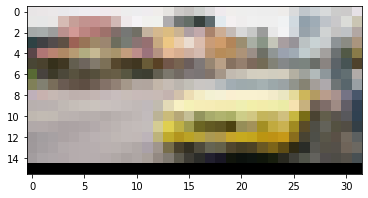

In [76]:
rotation == True
mirroring == False


plt.imshow(augment(single_batch_of_resized_images_array[0]))
plt.show()


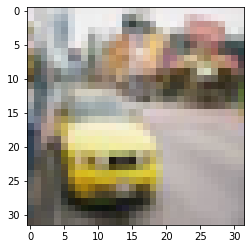

In [149]:
#single_resized_batch_of_images[0]
#0,1 ---- 
plt.imshow( single_batch_of_images[0])
plt.show()

In [81]:
class_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog',
                           7: 'horse', 8: 'ship', 9: 'truck'}

In [84]:
class_dict[0,5,6]

KeyError: (0, 5, 6)

In [18]:
#step 7: resize the images (self.image_size)
(aaa,h,w,bbb) = single_batch_of_images.shape
single_resized_batch_of_images = scipy.ndimage.zoom(single_batch_of_images, zoom = (1,image_size[0]/h,image_size[1]/w,1), order=0)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols, titles):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    #assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    #if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

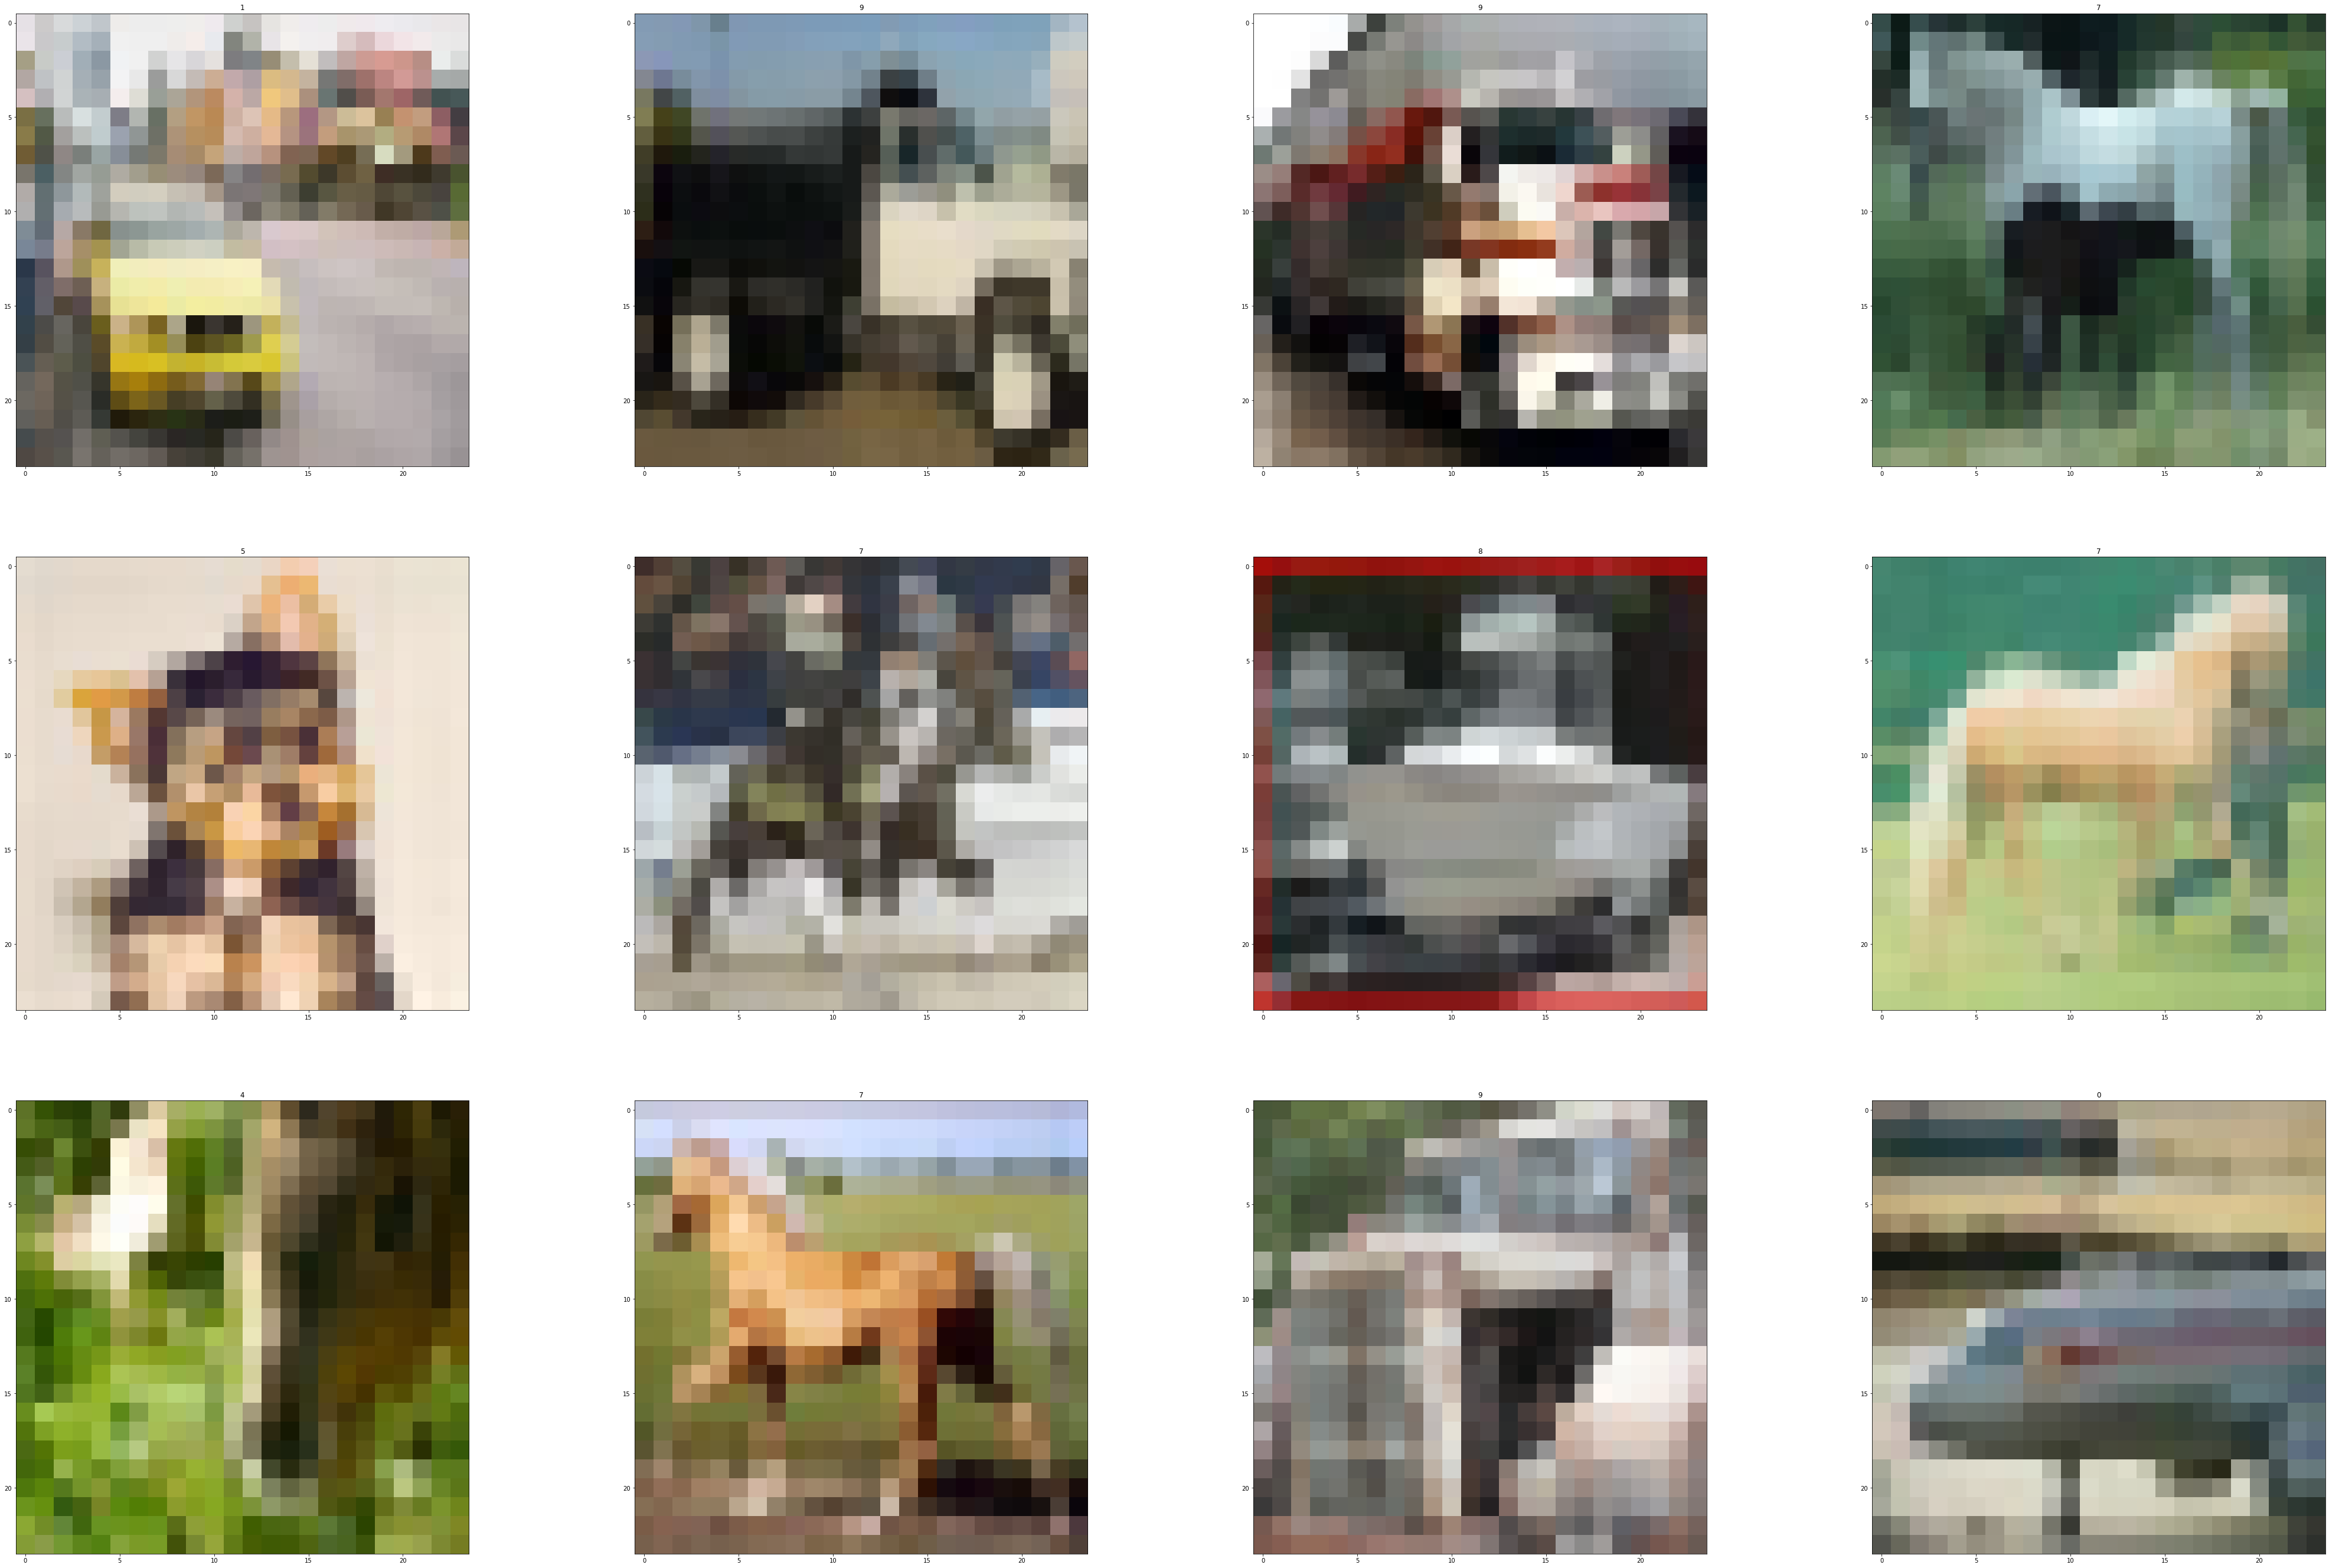

In [29]:
show_images(batch, cols = int(round(np.sqrt(batch_size))), titles = lables)

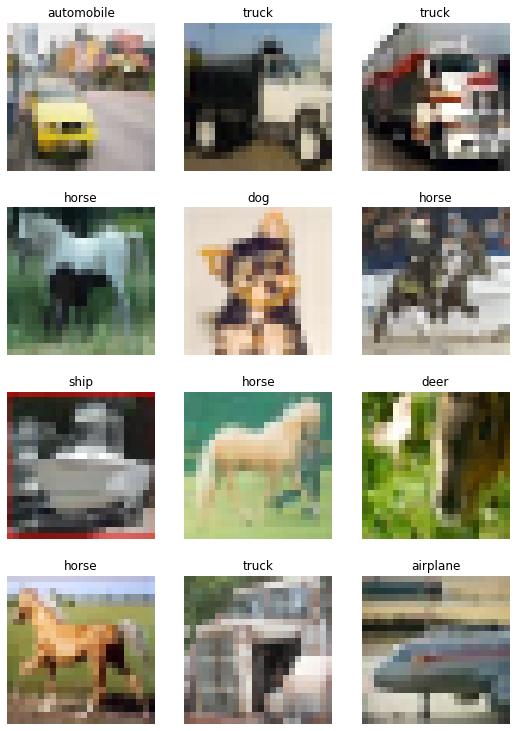

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#w = 10
#h = 10
fig = plt.figure(figsize=(9, 13))
cols = int(round(np.sqrt(batch_size)))
rows = np.ceil(batch_size/cols)

# prep (x,y) for extra plotting
#xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
#ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
img_grid = []

for i in range(len(batch)):
    img = batch[i]
    # create subplot and append to ax
    img_grid.append( fig.add_subplot(rows, cols, i+1) )
    img_grid[-1].set_title(class_name(lables[i]))  # set title
    plt.axis('off')
    plt.imshow(img)

# do extra plots on selected axes/subplots
# note: index starts with 0
#ax[2].plot(xs, 3*ys)
#ax[19].plot(ys**2, xs)

plt.show()  # finally, render the plot

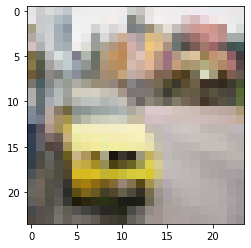

In [33]:
plt.imshow(batch[0])

In [43]:
len(batched_image_names_matrix)

9

In [47]:
if counter  1:
    print ('hey')

hey
